In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/electricity-prices/clean_data.csv


***Import dataset***

In [2]:
df=pd.read_csv('/kaggle/input/electricity-prices/clean_data.csv')

***Showing head columns***

In [3]:
df.head()

,year,month,stateDescription,sectorName,customers,price,revenue,sales
0,2001,1,Wyoming,all sectors,NaN,4.31,48.12840,1116.17208
1,2001,1,Wyoming,commercial,NaN,5.13,12.67978,247.08691
2,2001,1,Wyoming,industrial,NaN,3.26,19.60858,602.30484
3,2001,1,Wyoming,other,NaN,4.75,0.76868,16.17442
4,2001,1,Wyoming,residential,NaN,6.01,15.07136,250.60591


***Check shape of dataset***

In [4]:
df.shape

(85870, 8)

***information about the data***

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85870 entries, 0 to 85869
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              85870 non-null  int64  
 1   month             85870 non-null  int64  
 2   stateDescription  85870 non-null  object 
 3   sectorName        85870 non-null  object 
 4   customers         59830 non-null  float64
 5   price             85870 non-null  float64
 6   revenue           85870 non-null  float64
 7   sales             85870 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 5.2+ MB


***Check NULL value in dataset***

In [6]:
df.isnull().sum()

year                    0
month                   0
stateDescription        0
sectorName              0
customers           26040
price                   0
revenue                 0
sales                   0
dtype: int64

***Drop customer columns***

In [7]:
df.drop(columns='customers',inplace=True)

***Showing random data***

In [8]:
df.sample(5)

,year,month,stateDescription,sectorName,price,revenue,sales
55711,2015,12,Montana,all sectors,8.65,114.46110,1323.51628
21127,2006,9,Virginia,all sectors,6.99,603.44651,8631.28892
9173,2003,6,California,all sectors,13.00,2616.01006,20122.93697
18010,2005,11,U.S. Total,industrial,5.83,4871.57247,83512.20261
53477,2015,5,Oklahoma,commercial,7.37,124.42522,1689.20988


***Covert month by month name for better understanding***

In [9]:
df['month']=pd.to_datetime(df['month']).dt.month_name()

In [10]:
df.head(2)

,year,month,stateDescription,sectorName,price,revenue,sales
0,2001,January,Wyoming,all sectors,4.31,48.12840,1116.17208
1,2001,January,Wyoming,commercial,5.13,12.67978,247.08691


***Value counts of state***

In [11]:
df['stateDescription'].value_counts()

stateDescription
Wyoming          1385
Kansas           1385
North Dakota     1385
Ohio             1385
Oklahoma         1385
                 ... 
Montana          1385
Nebraska         1385
Nevada           1385
New Hampshire    1385
Pennsylvania     1385
Name: count, Length: 62, dtype: int64

***check weightage of sector which provide the electricity***

In [12]:
df['sectorName'].value_counts()

sectorName
all sectors       17174
commercial        17174
industrial        17174
residential       17174
transportation    15686
other              1488
Name: count, dtype: int64

***Plot the weightage of sector***

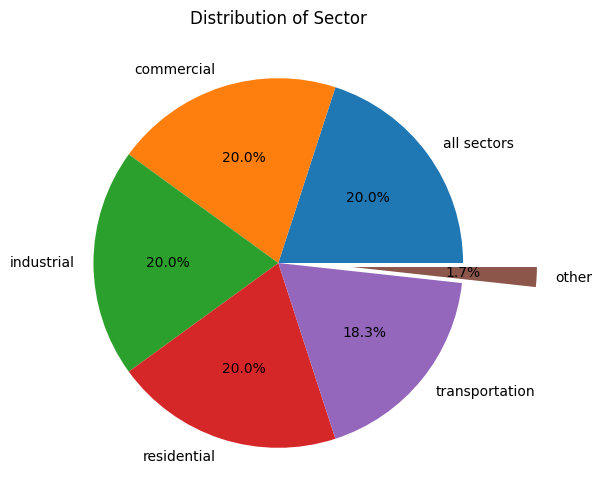

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,6))
df['sectorName'].value_counts().plot(kind='pie',autopct='%1.1f%%',labels=['all sectors','commercial','industrial','residential','transportation','other'],explode=[0,0,0,0,0,0.4])
plt.title('Distribution of Sector')
plt.ylabel('')
plt.show()

***Grouping sales by year***

In [14]:
total_sales=df.groupby('year')['sales'].sum().reset_index()
total_sales

,year,sales
0,2001,2.036675e+07
1,2002,2.079280e+07
2,2003,2.096241e+07
3,2004,2.128488e+07
4,2005,2.196581e+07
5,2006,2.201951e+07
6,2007,2.258736e+07
7,2008,2.240379e+07
8,2009,2.158077e+07
9,2010,2.252905e+07


***Import warnings for ignore the warning***

In [15]:
import warnings 
warnings.filterwarnings('ignore')

***Ploting total sales over the year***

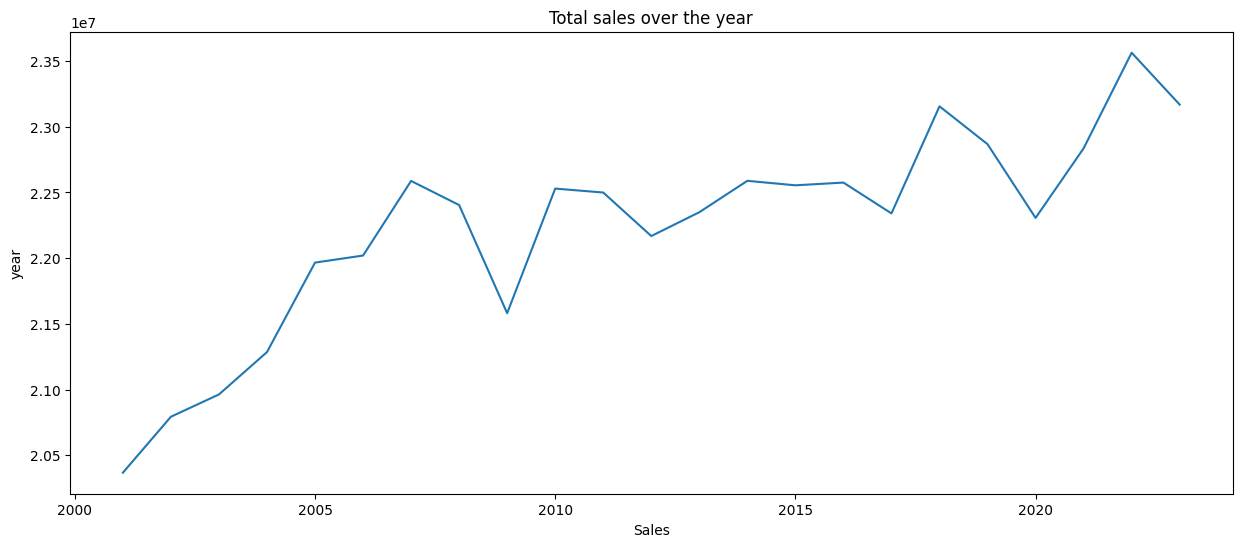

In [16]:
plt.figure(figsize=(15,6))
sns.lineplot(data=total_sales.head(23),x='year',y='sales')
plt.title('Total sales over the year')
plt.xlabel('Sales')
plt.ylabel('year')
plt.show()

***Grouping revenue by year***

In [17]:
total_revenue=df.groupby('year')['revenue'].sum().reset_index()
total_revenue

,year,revenue
0,2001,1.484059e+06
1,2002,1.496463e+06
2,2003,1.558601e+06
3,2004,1.620715e+06
4,2005,1.788017e+06
5,2006,1.959036e+06
6,2007,2.062215e+06
7,2008,2.181499e+06
8,2009,2.119736e+06
9,2010,2.213509e+06


***Ploting the Trend of Revenue over the year***

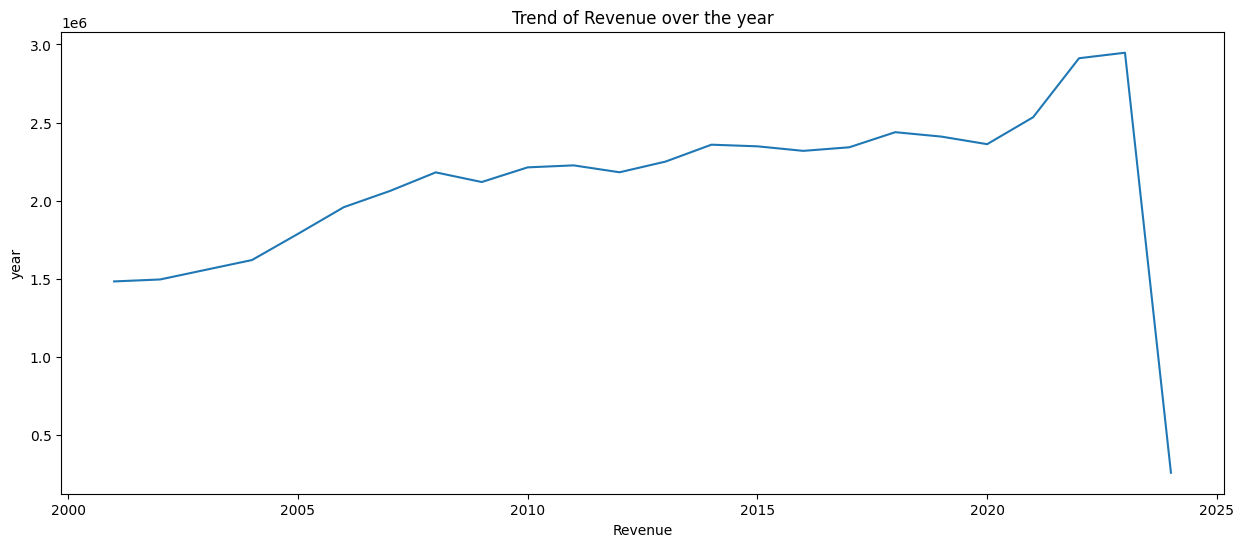

In [18]:
plt.figure(figsize=(15,6))
sns.lineplot(data=total_revenue,x='year',y='revenue')
plt.title('Trend of Revenue over the year')
plt.xlabel('Revenue')
plt.ylabel('year')
plt.show()

***Comparision of sales and revenue over the year***

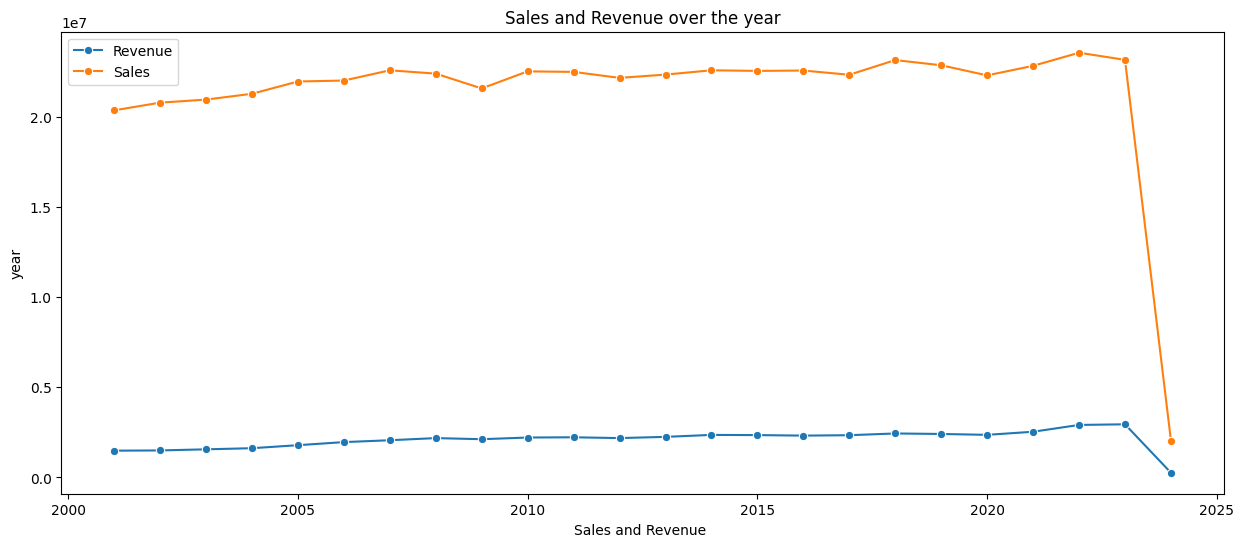

In [19]:
plt.figure(figsize=(15,6))
sns.lineplot(data=total_revenue,x='year',y='revenue',marker='o',label='Revenue')
sns.lineplot(data=total_sales,x='year',y='sales',marker='o',label='Sales')
plt.title('Sales and Revenue over the year')
plt.xlabel('Sales and Revenue ')
plt.ylabel('year')
plt.show()

***group the state wise sales***

In [20]:
state_sales=df.groupby('stateDescription')['sales'].sum().reset_index()
state_sales

,stateDescription,sales
0,Alabama,4.026660e+06
1,Alaska,2.788913e+05
2,Arizona,3.457532e+06
3,Arkansas,2.141348e+06
4,California,1.175959e+07
...,...,...
57,West North Central,1.337787e+07
58,West South Central,2.635671e+07
59,West Virginia,1.457663e+06
60,Wisconsin,3.179208e+06


***Ploting the sales by state***

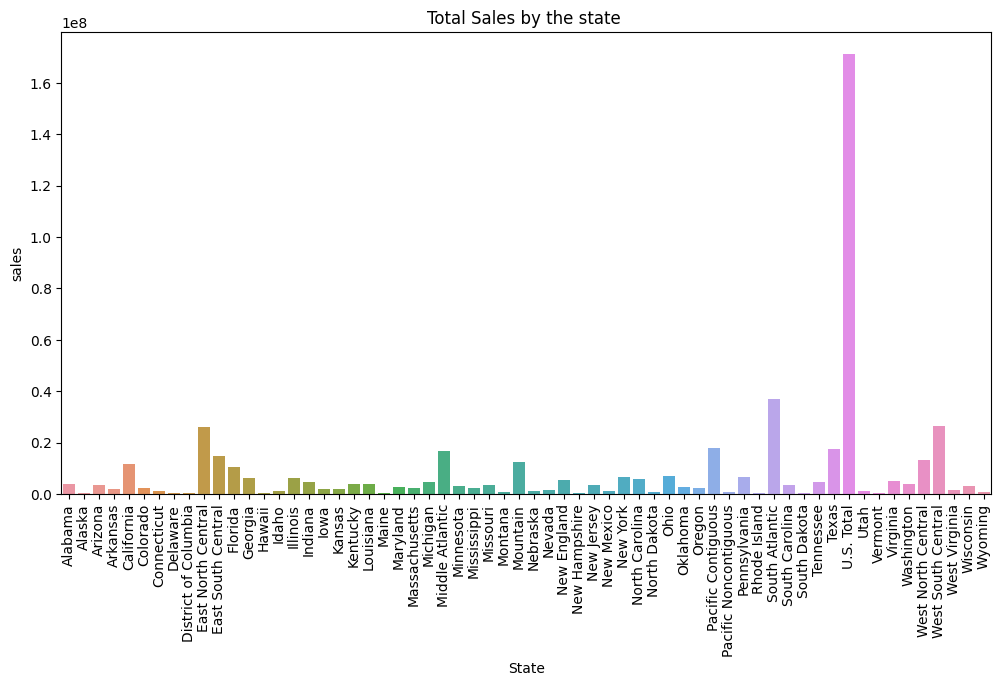

In [21]:
plt.figure(figsize=(12,6))
sns.barplot(data=state_sales,x='stateDescription',y='sales')
plt.title('Total Sales by the state ')
plt.xlabel('State')
plt.ylabel('sales')
plt.xticks(rotation=90)
plt.show()

***Grouping the sales by sector***

In [22]:
sector_wise_sales=df.groupby('sectorName')['sales'].sum()
sector_wise_sales

sectorName
all sectors       2.567534e+08
commercial        9.049624e+07
industrial        6.891553e+07
other             6.561768e+05
residential       9.621918e+07
transportation    4.662672e+05
Name: sales, dtype: float64

***Sales according to sector***

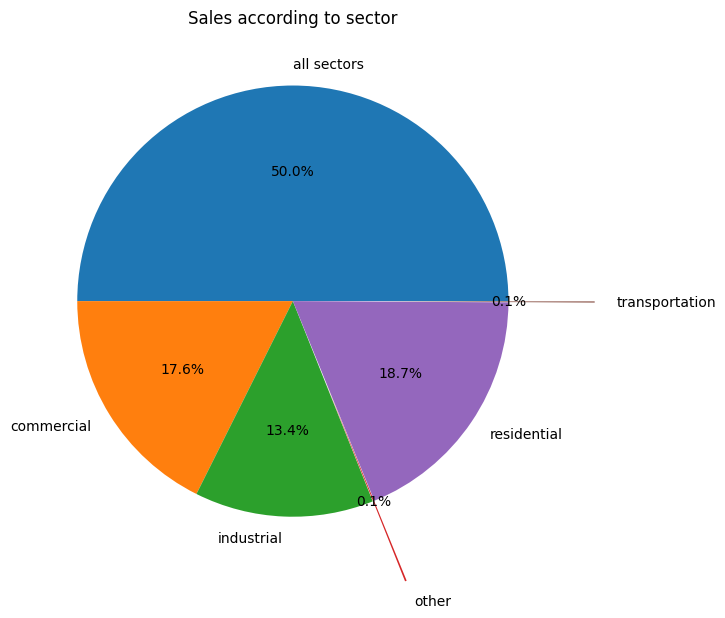

In [23]:
plt.figure(figsize=(7,7))
sector_wise_sales.plot(kind='pie',autopct='%1.1f%%',labels=['all sectors','commercial','industrial',
                                                          'other','residential','transportation']
                      ,explode=[0,0,0,0.4,0,0.4])
plt.title('Sales according to sector')
plt.ylabel('')
plt.show()


***Month wise sales***

In [24]:
df.groupby('month')['sales'].sum()

month
January    5.135068e+08
Name: sales, dtype: float64

In [25]:
df['month'].value_counts()

month
January    85870
Name: count, dtype: int64